<a href="https://colab.research.google.com/github/opdrin09/MNCM/blob/main/Tarefa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Formulação do problema 1

 1 - Escreva um programa de computador (Fortran, C++ ou Python) para resolver o
 problema de sedimentação de uma esfera em baixo Reynolds na sua forma adimensional
 e compare sua solução com a solução analítica;


 Como há uma comparação com a analítica, supõe-se que se deva fazer a mesma consideração que a disposta no slide, de que por baixo Reynolds, pode-se supor $Re \approx 0$, de fato o que se pretende resolver inicialmente é:

 $st \frac{dv^*_z}{dt*}=-v_z^*+1$


 ```



```

In [10]:
# Carrega a biblioteca para fazer os gráficos
using Plots

# --- Parâmetros Globais da Simulação ---
const T_MAXIMO = 10
const τ = 1.0

1.0

$m_p \frac{dv_z}{Δt} = -6\pi\eta a v_z- \frac{9}{4} \pi \rho_f a^2 v_z^2+\frac{4}{3} \pi a^3  \Delta \rho g$

Dados: $v_z^* = \frac{v_z}{vs}$,   $t^* = t a/v_s$, $St = \frac{m_p v_s}{6 \pi \eta a^2} $ e $6\pi\eta a  v_s=\frac{4}{3} \pi a^3  \Delta \rho g$


$m_p \frac{v_s^2}{a} \frac{dv_z^*}{Δt^*}  = -6\pi\eta a  v_s v_z^*    - \frac{9}{4} \pi \rho_f a^2 v_s^2 v_z^{*2}+\frac{4}{3} \pi a^3  \Delta \rho g$, divindo-se a equação por $6\pi\eta a  v_s$:

$St \frac{dv_z^*}{Δt^*} = -v_z^* -  \frac{3}{8} \frac{ \rho_f a v_s }{\eta}v_z^{*2} +\frac{2}{9}  \frac{a^2  \Delta \rho g}{\eta u_s} $

$St \frac{dv_z^*}{Δt^*} = -v_z^* -  \frac{3}{8} Re v_z^{*2} +1 $

In [11]:
# Solucionador genérico de EDOs usando Runge-Kutta de 4ª Ordem
function resolver_rk4(f_edo, v_inicial, t_inicial, t_maximo, Δt)
    v_atual = v_inicial
    t_atual = t_inicial
    passos_tempo = []
    passos_velocidade = []

    while t_atual < t_maximo
        push!(passos_velocidade, v_atual)
        push!(passos_tempo, t_atual)

        k1 = f_edo(t_atual, v_atual)
        k2 = f_edo(t_atual + Δt/2, v_atual + k1*Δt/2)
        k3 = f_edo(t_atual + Δt/2, v_atual + k2*Δt/2)
        k4 = f_edo(t_atual + Δt/2, v_atual + k3*Δt)
        v_proximo = v_atual + Δt * (k1 + 2*k2 + 2*k3 + k4) / 6

        t_atual += Δt
        v_atual = v_proximo
    end

    push!(passos_velocidade, v_atual)
    push!(passos_tempo, t_atual)

    return passos_tempo, passos_velocidade
end

resolver_rk4 (generic function with 1 method)

In [12]:
# Define a equação diferencial para o arrasto de Stokes (linear)
f_stokes(t, v) = (-v + 1) / τ

f_stokes (generic function with 1 method)

In [25]:
# Calcula a solução analítica/exata para comparação
tempo_analitico = range(0, T_MAXIMO, length=1000)
velocidade_analitica = @. 1 - ℯ^(-tempo_analitico / τ)
display(' ')

' ': ASCII/Unicode U+0020 (category Zs: Separator, space)

In [23]:
# Cria o gráfico inicial com a solução analítica
grafico_stokes = plot(tempo_analitico, velocidade_analitica,
    ylabel="Velocidade Adimensional (v/vₜ)",
    xlabel="Tempo Adimensional (t/τ)",
    label="Solução Analítica",
    linewidth=3,
    linestyle=:dash,
    legend=:bottomright,
    title="Sedimentação com Baixo Reynolds (Arrasto de Stokes)"
)
display(0)

0

In [15]:
# Loop para calcular e plotar a solução numérica com diferentes passos de tempo (Δt)
println("Executando simulação para Baixo Reynolds...")
for i in 0:7
    Δt = 2 * 1.5^(-i)
    tempo_numerico, velocidade_numerica = resolver_rk4(f_stokes, 0.0, 0.0, T_MAXIMO, Δt)
    plot!(grafico_stokes, tempo_numerico, velocidade_numerica,
        label="Numérico: Δt=$(round(Δt, digits=3))",
        linestyle=:solid,
        linewidth=1.5
    )
end
println("Finalizado.")

Executando simulação para Baixo Reynolds...
Finalizado.


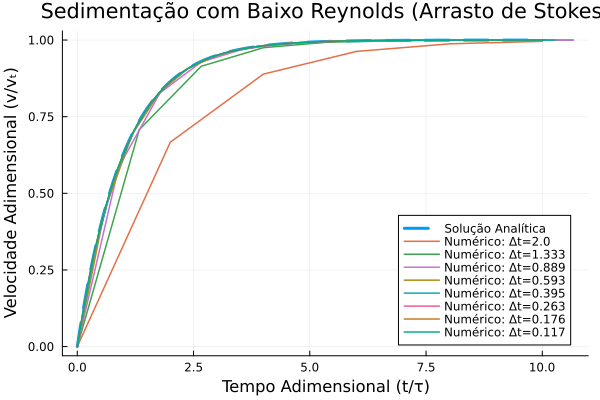

In [16]:
# Exibe o gráfico final da simulação 1
display(grafico_stokes)

In [17]:
# Define a equação com o termo de arrasto quadrático
f_quadratica(t, v, Re) = (-v - (3/8) * Re * v^2 + 1) / τ

f_quadratica (generic function with 1 method)

In [26]:
# Cria um novo gráfico, começando com a solução de Re=0 como referência
grafico_reynolds = plot(tempo_analitico, velocidade_analitica,
    ylabel="Velocidade Adimensional (v/vₜ)",
    xlabel="Tempo Adimensional (t/τ)",
    label="Analítica (Re=0)",
    linewidth=3,
    linestyle=:dash,
    ylims=(0, 1.05),
    legend=:bottomright,
    title="Efeito do Número de Reynolds na Sedimentação"
)
display(0)

0

In [19]:
# Loop para calcular e plotar a solução numérica para vários valores de Re
println("Executando simulação para diferentes Reynolds...")
Δt_fixo = 0.01

for i in 0:10
    Re = 5.0 * 2^(i) - 5.0
    f_com_re(t, v) = f_quadratica(t, v, Re)
    tempo_numerico, velocidade_numerica = resolver_rk4(f_com_re, 0.0, 0.0, T_MAXIMO, Δt_fixo)

    plot!(grafico_reynolds, tempo_numerico, velocidade_numerica,
        label="Re = $(round(Int, Re))",
        linestyle=:solid,
        linewidth=1.5
    )
end
println("Finalizado.")

Executando simulação para diferentes Reynolds...
Finalizado.


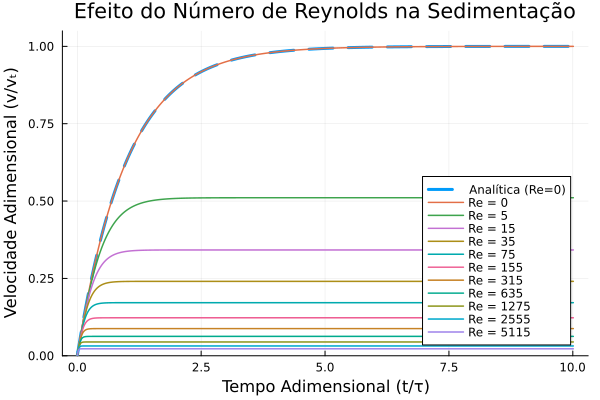

In [20]:
# Exibe o gráfico final da simulação 2
display(grafico_reynolds)